In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv("credit_approval.csv")

### **1. Analiza și vizualizarea datelor**

In [ ]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [ ]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


In [ ]:
data.describe(include=[object])

,Industry,Ethnicity,Citizen
count,690,690,690
unique,14,5,3
top,Energy,White,ByBirth
freq,146,408,625


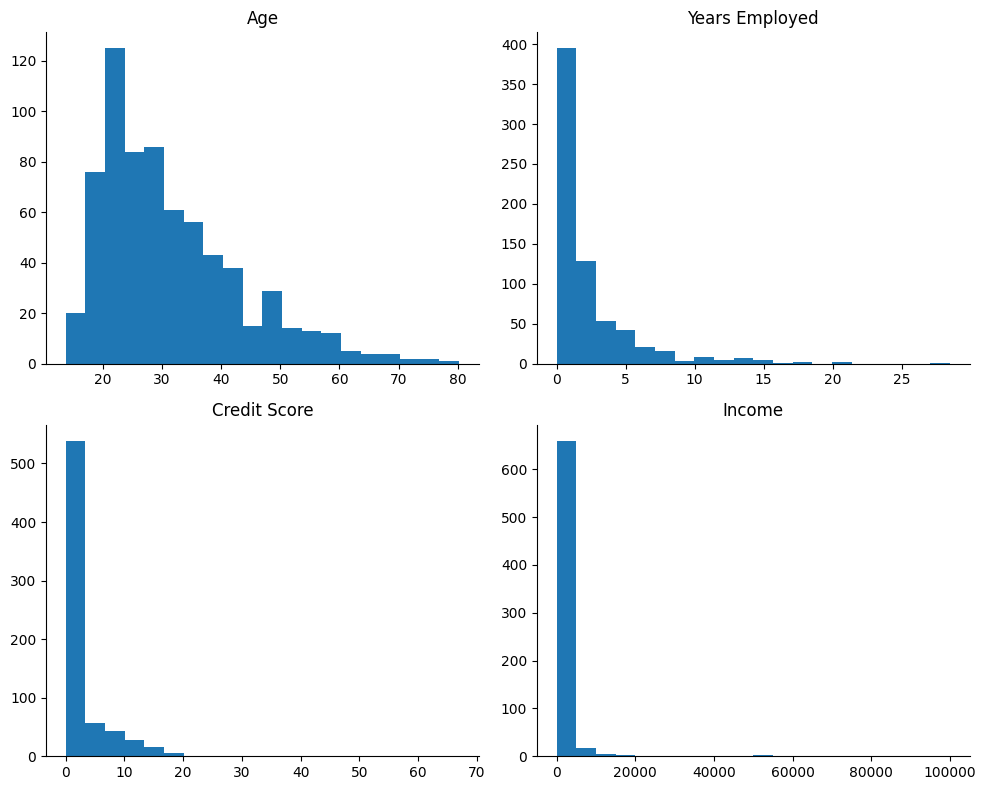

In [ ]:
# @title Histogram: Age, YearsEmployed, CreditScore, Income

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(data['Age'], bins=20)
axs[0, 0].set_title('Age')
axs[0, 0].spines[['top', 'right']].set_visible(False)

axs[0, 1].hist(data['YearsEmployed'], bins=20)
axs[0, 1].set_title('Years Employed')
axs[0, 1].spines[['top', 'right']].set_visible(False)

axs[1, 0].hist(data['CreditScore'], bins=20)
axs[1, 0].set_title('Credit Score')
axs[1, 0].spines[['top', 'right']].set_visible(False)

axs[1, 1].hist(data['Income'], bins=20)
axs[1, 1].set_title('Income')
axs[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


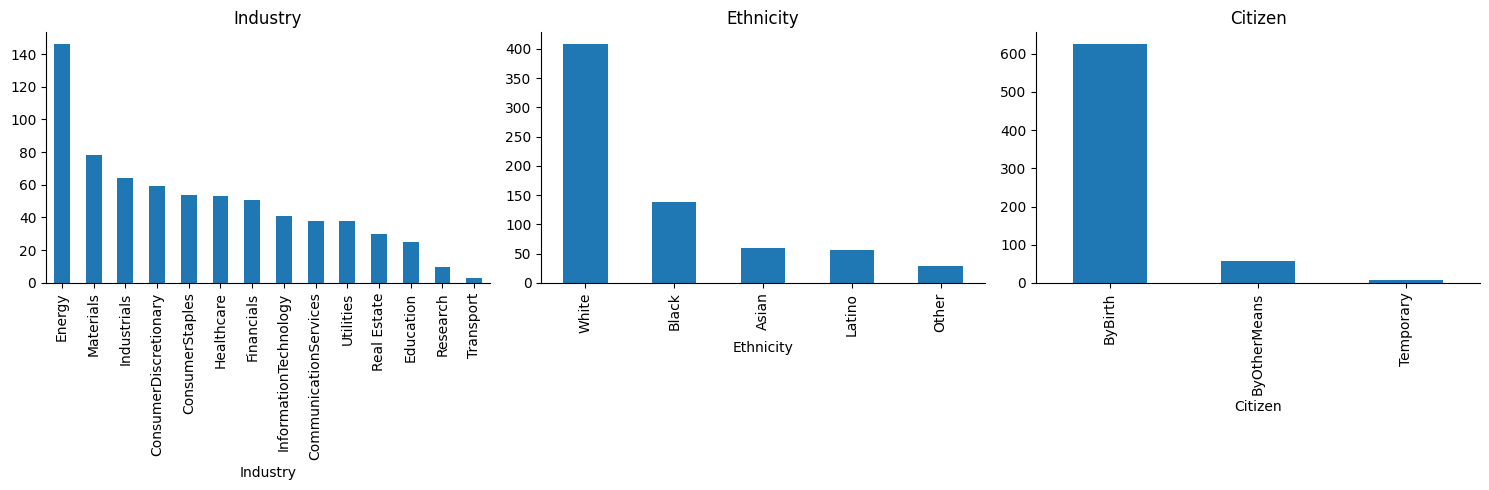

In [ ]:
# @title Bar plot: Industry, Ethnicity, Citizen

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

data['Industry'].value_counts().plot(kind='bar', ax=axs[0])
axs[0].set_title('Industry')
axs[0].spines[['top', 'right']].set_visible(False)

data['Ethnicity'].value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_title('Ethnicity')
axs[1].spines[['top', 'right']].set_visible(False)

data['Citizen'].value_counts().plot(kind='bar', ax=axs[2])
axs[2].set_title('Citizen')
axs[2].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


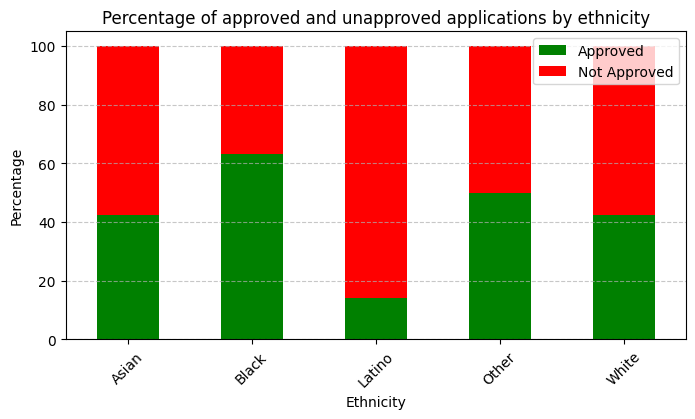

In [ ]:
# @title Percentage of approved and unapproved applications by ethnicity


total_per_ethnicity = data['Ethnicity'].value_counts()
approved_per_ethnicity = data[data['Approved'] == 1]['Ethnicity'].value_counts()

approval_percentage_per_ethnicity = (approved_per_ethnicity / total_per_ethnicity) * 100
disapproval_percentage_per_ethnicity = 100 - approval_percentage_per_ethnicity

plt.figure(figsize=(8, 4))
approval_percentage_per_ethnicity.plot(kind='bar', color='green', label='Approved')
disapproval_percentage_per_ethnicity.plot(kind='bar', color='red', label='Not Approved', bottom=approval_percentage_per_ethnicity)
plt.title('Percentage of approved and unapproved applications by ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Arată graficul
plt.show()


In [ ]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("\n")

Value counts for column 'Gender':
Gender
1    480
0    210
Name: count, dtype: int64


Value counts for column 'Age':
Age
28.46    12
22.67     9
20.42     7
18.83     6
24.50     6
         ..
48.25     1
28.33     1
18.75     1
18.50     1
36.42     1
Name: count, Length: 350, dtype: int64


Value counts for column 'Debt':
Debt
1.500     21
0.000     19
3.000     19
2.500     19
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: count, Length: 215, dtype: int64


Value counts for column 'Married':
Married
1    525
0    165
Name: count, dtype: int64


Value counts for column 'BankCustomer':
BankCustomer
1    527
0    163
Name: count, dtype: int64


Value counts for column 'Industry':
Industry
Energy                   146
Materials                 78
Industrials               64
ConsumerDiscretionary     59
ConsumerStaples           54
Healthcare                53
Financials                51
InformationTechnology     41
CommunicationServic

### **2. Preprocesarea datelor**

In [ ]:
lb = LabelEncoder()
for col in ['Industry', 'Ethnicity', 'Citizen']:
    data[col] = lb.fit_transform(data[col])


scaler = StandardScaler()
cols = ['CreditScore']
data[cols] = scaler.fit_transform(data[cols])

In [ ]:
X = data.drop(columns=['Approved'])
y = data['Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Feature importance and correlation analysis**

           Feature  Importance
8     PriorDefault    0.297467
7    YearsEmployed    0.103060
10     CreditScore    0.094527
14          Income    0.086703
2             Debt    0.079638
1              Age    0.070692
13         ZipCode    0.069256
9         Employed    0.055522
5         Industry    0.051891
6        Ethnicity    0.026384
12         Citizen    0.016172
0           Gender    0.013558
11  DriversLicense    0.012594
3          Married    0.011881
4     BankCustomer    0.010657


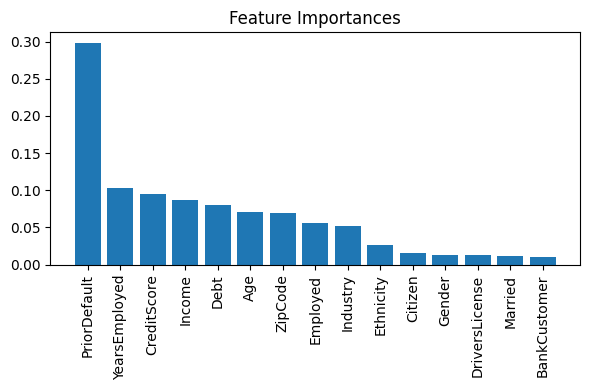

In [ ]:
# @title Feature importance

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

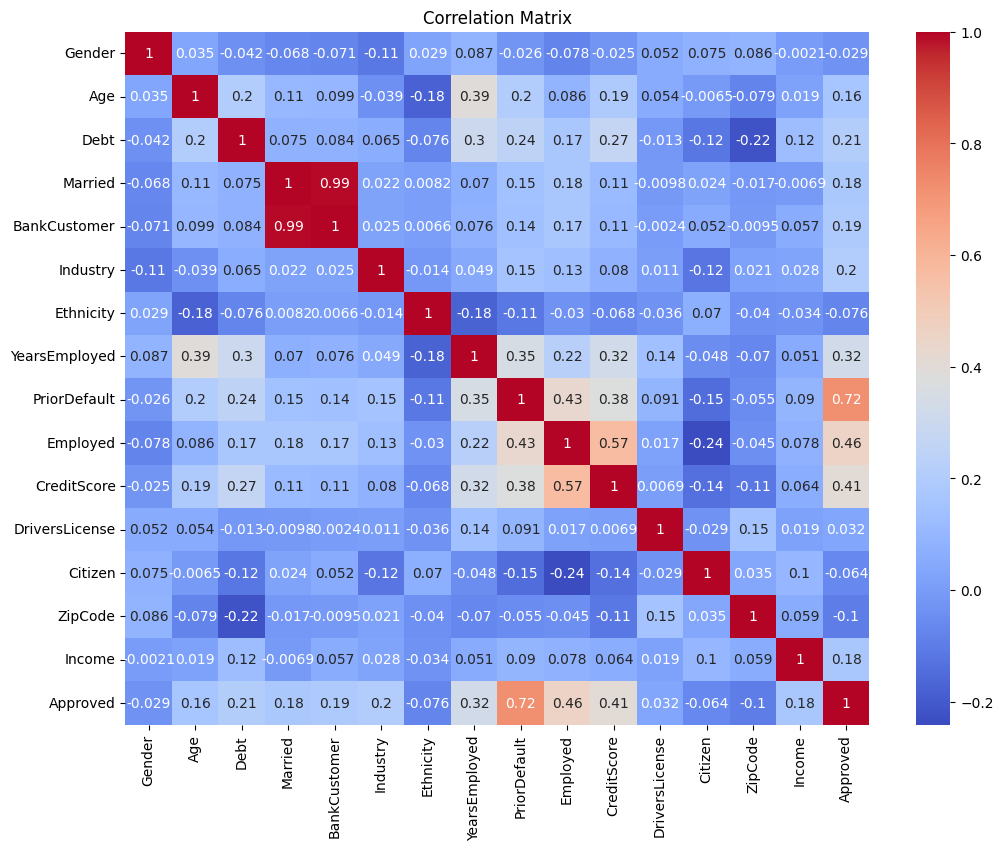

In [ ]:
# @title Correlation Matrix

correlation_matrix = data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### **Model and evaluation**

In [ ]:
# @title RandomForestClassifier M1

y_pred_m1 = rf.predict(X_test)

acc_m1 = accuracy_score(y_test, y_pred_m1)
precision_m1 = precision_score(y_test, y_pred_m1)
recall_m1 = recall_score(y_test, y_pred_m1)
f1_m1 = f1_score(y_test, y_pred_m1)
crep_m1 = classification_report(y_test, y_pred_m1)

print("Model performance:")
print(f"Accuracy: {acc_m1:.2%}")
print(f"Precision: {precision_m1:.2%}")
print(f"Recall: {recall_m1:.2%}")
print(f"F1 Score: {f1_m1:.2%}")
print("\nClassification report:\n", crep_m1)

Model performance:
Accuracy: 85.51%
Precision: 83.17%
Recall: 86.60%
F1 Score: 84.85%

Classification report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       110
           1       0.83      0.87      0.85        97

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207



In [ ]:
# @title Params tuning with GridSearchCV

params= {
    'n_estimators': [30, 40, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)



Fitting 3 folds for each of 540 candidates, totalling 1620 fits
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 30}


In [ ]:
# @title RandomForestClassifier M2

rf2 = RandomForestClassifier(n_estimators=40, min_samples_split=5, random_state=42)
rf2.fit(X_train, y_train)

y_pred_m2 = rf2.predict(X_test)
acc_m2 = accuracy_score(y_test, y_pred_m2)
precision_m2 = precision_score(y_test, y_pred_m2)
recall_m2 = recall_score(y_test, y_pred_m2)
f1_m2 = f1_score(y_test, y_pred_m2)
crep_m2 = classification_report(y_test, y_pred_m2)

print("Model performance:")
print(f"Accuracy: {acc_m2:.2%}")
print(f"Precision: {precision_m2:.2%}")
print(f"Recall: {recall_m2:.2%}")
print(f"F1 Score: {f1_m2:.2%}")
print("\nClassification report:\n", crep_m2)

Model performance:
Accuracy: 87.92%
Precision: 86.00%
Recall: 88.66%
F1 Score: 87.31%

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       110
           1       0.86      0.89      0.87        97

    accuracy                           0.88       207
   macro avg       0.88      0.88      0.88       207
weighted avg       0.88      0.88      0.88       207



In [ ]:
# @title LogisticRegression

lr = LogisticRegression(max_iter=1300)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)

print("Model performance:")
print(f"Accuracy: {acc_lr:.2%}")
print(f"Precision: {precision_lr:.2%}")
print(f"Recall: {recall_lr:.2%}")
print(f"F1 Score: {f1_lr:.2%}")

Model performance:
Accuracy: 83.57%
Precision: 79.44%
Recall: 87.63%
F1 Score: 83.33%
